## Información sobre Internaciones en la Ciudad de Buenos Aires.

**Información publicada en https://data.buenosaires.gob.ar/dataset/movimiento-hospitalario

Esta información nos permite saber los servicios, especialidades y hospitales de la ciudad, y los ingresos, altas y defunciones, desde el año 2011 al año 2017.

**El Ministerio de Salud del Gobierno de la Ciudad Autónoma de Buenos Aires, necesita evaluar su desempeño en los Hospitales Públicos y tiene la impresión de que la tasa de mortalidad en el servicio de internaciones de sus nosocomios se ha mantenido de manera constante en sus Hospitales Públicos en el transcurso de 6 años. Consideran que la mayor cantidad de decesos se producen por intervenciones quirúrgicas. ¿Es correcto?

**A su vez, necesita saber en qué Hospitales la tasa de mortalidad es mayor, y en qué servicios.

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [87]:
df = pd.read_excel('mh_internacion.xlsx')
df.head(5)


,SERVICIO,ESPECIALIDADES,ING,PASES_A,ING_PASES,ALTAS,DEF,TOTAL,PASES_B,EGR_PASES,...,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,PORCENTAJE_OCUP,PROMEDIO_PERM,GIRO,TASA_MORT_HOSP,ANIO,SK_ID_EFECTOR,NOM_EFECTOR_BADATA,OBSERVACIONES
0,Cirugia,Urologia,304,21.0,325.0,319.0,0.0,319.0,4.0,323.0,...,1292.0,499.0,3861.0,563.0,2501.0,0.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
1,Cirugia,Subtotal Cirugia,4661,634.0,5295.0,4616.0,27.0,4643.0,646.0,5289.0,...,13295.0,7213.0,5425.0,498.0,3978.0,51.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
2,Urgencia,Terapia Intensiva,101,236.0,337.0,3.0,62.0,65.0,273.0,338.0,...,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
3,Urgencia,Subtotal Urgencia,101,236.0,337.0,3.0,62.0,65.0,273.0,338.0,...,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN
4,Urgencia,Total Hospital,9749,1592.0,11341.0,9633.0,124.0,9757.0,1592.0,11349.0,...,31812.0,21721.0,6828.0,813.0,3067.0,127.0,2011,2164,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,NaN


In [31]:
print(df.describe) # Utilizamos este método para observar si detectan anomalías a primera vista

<bound method NDFrame.describe of              SERVICIO            ESPECIALIDADES   ING  PASES_A  ING_PASES  \
0             Cirugia                  Urologia   304     21.0      325.0   
1             Cirugia          Subtotal Cirugia  4661    634.0     5295.0   
2            Urgencia         Terapia Intensiva   101    236.0      337.0   
3            Urgencia         Subtotal Urgencia   101    236.0      337.0   
4            Urgencia            Total Hospital  9749   1592.0    11341.0   
...               ...                       ...   ...      ...        ...   
2809          Cirugia          Subtotal Cirugia     0     75.0       75.0   
2810         Urgencia           Guardia Del Día  3070      0.0     3070.0   
2811  Tocoginecologia  Subtotal Tocoginecologia  1838      5.0     1843.0   
2812         Urgencia        Terapia Intermedia     2      0.0        2.0   
2813        Pediatria        Recien Nacido Sano  2494      0.0     2494.0   

       ALTAS    DEF   TOTAL  PASES_B  EGR

In [88]:
df.isnull()

,SERVICIO,ESPECIALIDADES,ING,PASES_A,ING_PASES,ALTAS,DEF,TOTAL,PASES_B,EGR_PASES,...,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,PORCENTAJE_OCUP,PROMEDIO_PERM,GIRO,TASA_MORT_HOSP,ANIO,SK_ID_EFECTOR,NOM_EFECTOR_BADATA,OBSERVACIONES
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2811,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


**Dado que la columna "Observaciones" no será de nuestro interés, no se considera necesario reemplazar o eliminar las mismas, trabajaremos con 

*SERVICIO: Corresponde al ingreso del paciente en Hospital 
*ESPECIALIDADES:El subtipo de ingreso, donde ha sido derivado el paciente al ingreso
*TOTAL: La sumatoria entres de los pacientes que fallecieron y los que fueron dados de alta
*ALTAS:cantidad de pacientes dados de alta 
*DEF:cantidad de pacientes fallecidos
*TASA_MORT_HOSP: Tasa de mortalidad del Hospital 
*ANIO: año de ingreso del paciente
*NOM_EFECTOR_BADATA: nombre del Hospital

In [89]:
df[["SERVICIO","ESPECIALIDADES","TOTAL","ALTAS","DEF","TASA_MORT_HOSP","ANIO","NOM_EFECTOR_BADATA"]]

,SERVICIO,ESPECIALIDADES,TOTAL,ALTAS,DEF,TASA_MORT_HOSP,ANIO,NOM_EFECTOR_BADATA
0,Cirugia,Urologia,319.0,319.0,0.0,0.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
1,Cirugia,Subtotal Cirugia,4643.0,4616.0,27.0,51.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
2,Urgencia,Terapia Intensiva,65.0,3.0,62.0,1834.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
3,Urgencia,Subtotal Urgencia,65.0,3.0,62.0,1834.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
4,Urgencia,Total Hospital,9757.0,9633.0,124.0,127.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
...,...,...,...,...,...,...,...,...
2809,Cirugia,Subtotal Cirugia,19.0,16.0,3.0,3.0,2011,HOSPITAL DE SALUD MENTAL BRAULIO MOYANO
2810,Urgencia,Guardia Del Día,1363.0,1222.0,141.0,4.0,2012,HOSPITAL GENERAL DE AGUDOS J. A. PENNA
2811,Tocoginecologia,Subtotal Tocoginecologia,1842.0,1842.0,0.0,0.0,2012,HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD
2812,Urgencia,Terapia Intermedia,0.0,0.0,0.0,0.0,2011,HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD


**Poseemos información anual de Total de ingresos, defunciones, altas y tasa de mortalidad

In [90]:
df.groupby('ANIO')[['TOTAL', 'ALTAS', 'DEF', 'TASA_MORT_HOSP']].mean()

,TOTAL,ALTAS,DEF,TASA_MORT_HOSP
ANIO,,,,
2011,1338.019608,1292.781863,45.237745,378.655172
2012,1354.538847,1309.666667,44.872180,360.593985
2013,1349.339241,1302.744304,46.594937,361.956962
2014,1292.216080,1243.334171,48.881910,47.262087
2015,1256.880597,1207.858209,49.022388,452.885287
2016,1235.040201,1180.203518,54.836683,444.797980
2017,1194.384817,1144.327225,50.057592,420.603175


**Dado que el interés principal está basado en la Tasa de Mortalidad, realizaremos un histograma del mismo

Text(0.5, 1.0, 'Histograma de Mortalidad')

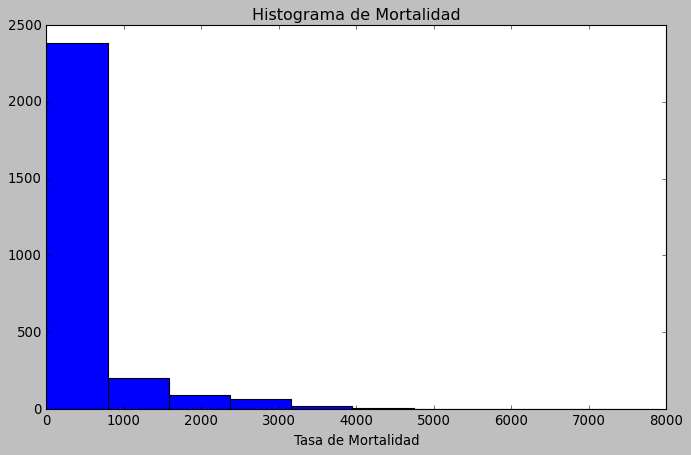

In [92]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= df.TASA_MORT_HOSP, bins=None, density=False, orientation='vertical')
ax.set_xlabel('Tasa de Mortalidad')
ax.set_title('Histograma de Mortalidad')

**Podemos realizar un comparativo del total de ingresos contra defunciones y altas de los datos suministrados

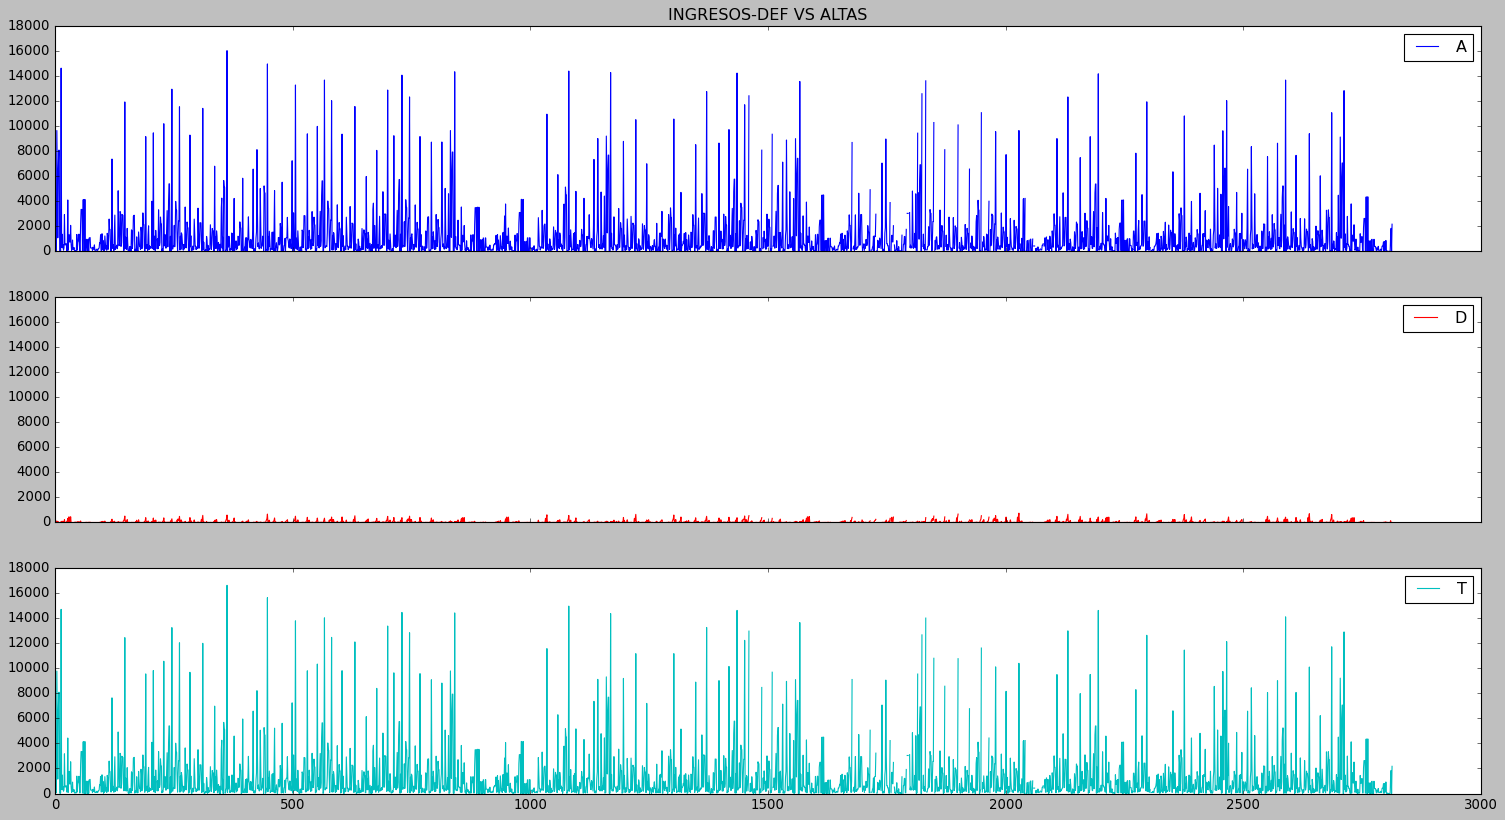

In [93]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(23, 12), sharex=True, sharey=True)  
ax[0].plot(df.index, df['ALTAS'], label='ALTAS')
ax[1].plot(df.index, df['DEF'], label='DEFUNCIONES', color='C2')
ax[2].plot(df.index, df['TOTAL'], label='TOTAL INGRESOS', color='C3')
ax[0].set_title('INGRESOS-DEF VS ALTAS')
ax[0].legend('A')  
ax[1].legend('D')
ax[2].legend('T')  


In [ ]:
*Buscamos la relación de defunciones por Hospitales, por lo que necesitamos saber con qué Hospitales estamos trabajando

In [56]:
df.NOM_EFECTOR_BADATA.value_counts()

HOSPITAL GENERAL DE AGUDOS J. M. RAMOS MEJIA                189
HOSPITAL GENERAL DE AGUDOS DR. C. DURAND                    181
HOSPITAL GENERAL DE AGUDOS DONACION F. SANTOJANNI           172
HOSPITAL GENERAL DE AGUDOS B. RIVADAVIA                     165
HOSPITAL GENERAL DE AGUDOS DR C. ARGERICH                   162
HOSPITAL GENERAL DE AGUDOS DR. I. PIROVANO                  156
HOSPITAL GENERAL DE AGUDOS DR. J. A. FERNANDEZ              149
HOSPITAL GENERAL DE AGUDOS DR. T. ALVAREZ                   148
HOSPITAL GENERAL DE NIÑOS PEDRO DE ELIZALDE                 134
HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ                 127
HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD               123
HOSPITAL GENERAL DE AGUDOS J. A. PENNA                      119
HOSPITAL GENERAL DE AGUDOS DR. E. TORNU                     106
HOSPITAL DE INFECCIOSAS F. MUÑIZ                            101
HOSPITAL DE QUEMADOS DR. ARTURO UMBERTO ILLIA                99
HOSPITAL GENERAL DE AGUDOS P. PIÑERO    

**Se observa una prevalencia en: Hospital Municipal de Oncología Marie Curie, Hospital General de Agudos P.Piñero Hospital y General de Agudos A. Zubizarreta

Text(0, 0.5, 'HOSPITALES')

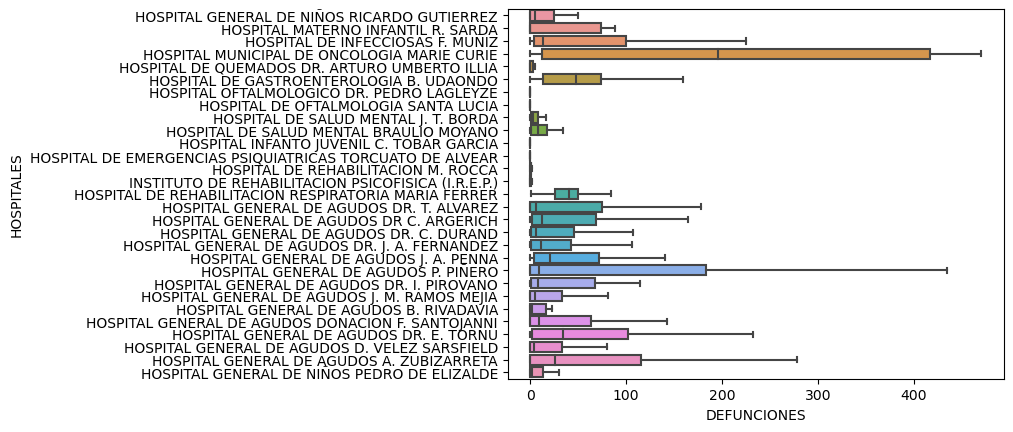

In [36]:
ax = sns.boxplot(x="DEF", y="NOM_EFECTOR_BADATA", data=df,showfliers=False)
plt.xlabel('DEFUNCIONES')
plt.ylabel('HOSPITALES')


In [ ]:
*Observamos las defunciones por Hospitales y ahora la tasa de mortalidad. Los decesos pueden ser altos a razón de la cantidad de ingresos, y por ese motivo necesitamos saber la tasa de mortalidad

Text(0, 0.5, 'HOSPITALES')

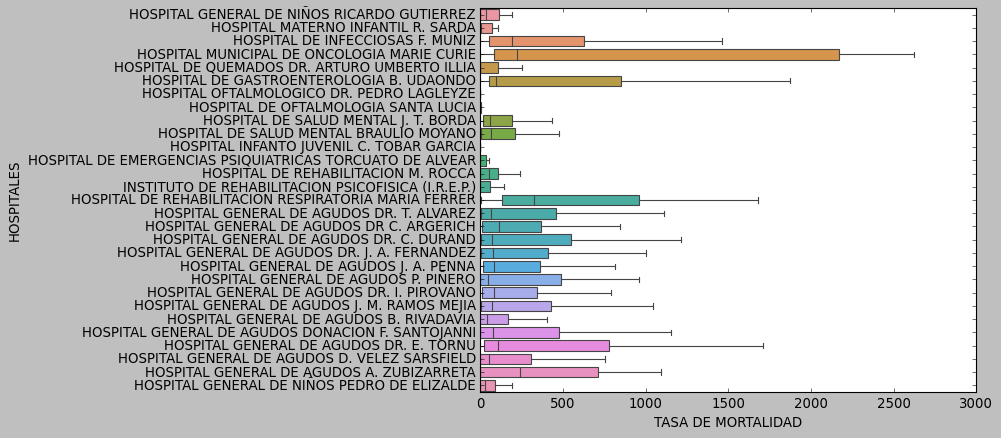

In [94]:
ax = sns.boxplot(x="TASA_MORT_HOSP", y="NOM_EFECTOR_BADATA", data=df,showfliers=False)
plt.xlabel('TASA DE MORTALIDAD')
plt.ylabel('HOSPITALES')

In [95]:
df.groupby('NOM_EFECTOR_BADATA')[['TOTAL', 'ALTAS', 'DEF', 'TASA_MORT_HOSP']].mean()

,TOTAL,ALTAS,DEF,TASA_MORT_HOSP
NOM_EFECTOR_BADATA,,,,
HOSPITAL DE EMERGENCIAS PSIQUIATRICAS TORCUATO DE ALVEAR,213.714286,213.571429,0.142857,19.487805
HOSPITAL DE GASTROENTEROLOGIA B. UDAONDO,816.163636,763.581818,52.581818,590.927273
HOSPITAL DE INFECCIOSAS F. MUÑIZ,885.690000,818.130000,67.560000,691.780000
HOSPITAL DE OFTALMOLOGIA SANTA LUCIA,2071.500000,2071.357143,0.142857,26.071429
HOSPITAL DE QUEMADOS DR. ARTURO UMBERTO ILLIA,297.336735,289.867347,7.469388,266.413043
HOSPITAL DE REHABILITACION M. ROCCA,111.428571,110.657143,0.771429,72.514286
HOSPITAL DE REHABILITACION RESPIRATORIA MARIA FERRER,697.071429,655.285714,41.785714,557.880952
HOSPITAL DE SALUD MENTAL BRAULIO MOYANO,457.285714,447.551020,9.734694,299.224490
HOSPITAL DE SALUD MENTAL J. T. BORDA,372.039216,367.098039,4.941176,144.725490


**Sin embargo la tasa de mortalidad es mayor en los hospitales: 
HOSPITAL MUNICIPAL DE ONCOLOGIA MARIE CURIE
HOSPITAL DE INFECCIOSAS F. MUÑIZ
HOSPITAL GENERAL DE AGUDOS DR. E. TORNU


**Se realiza un conteo para observar que servicios prevalecen en las atenciones, se observa que son: CIRUGIA,MEDICINA y URGENCIA

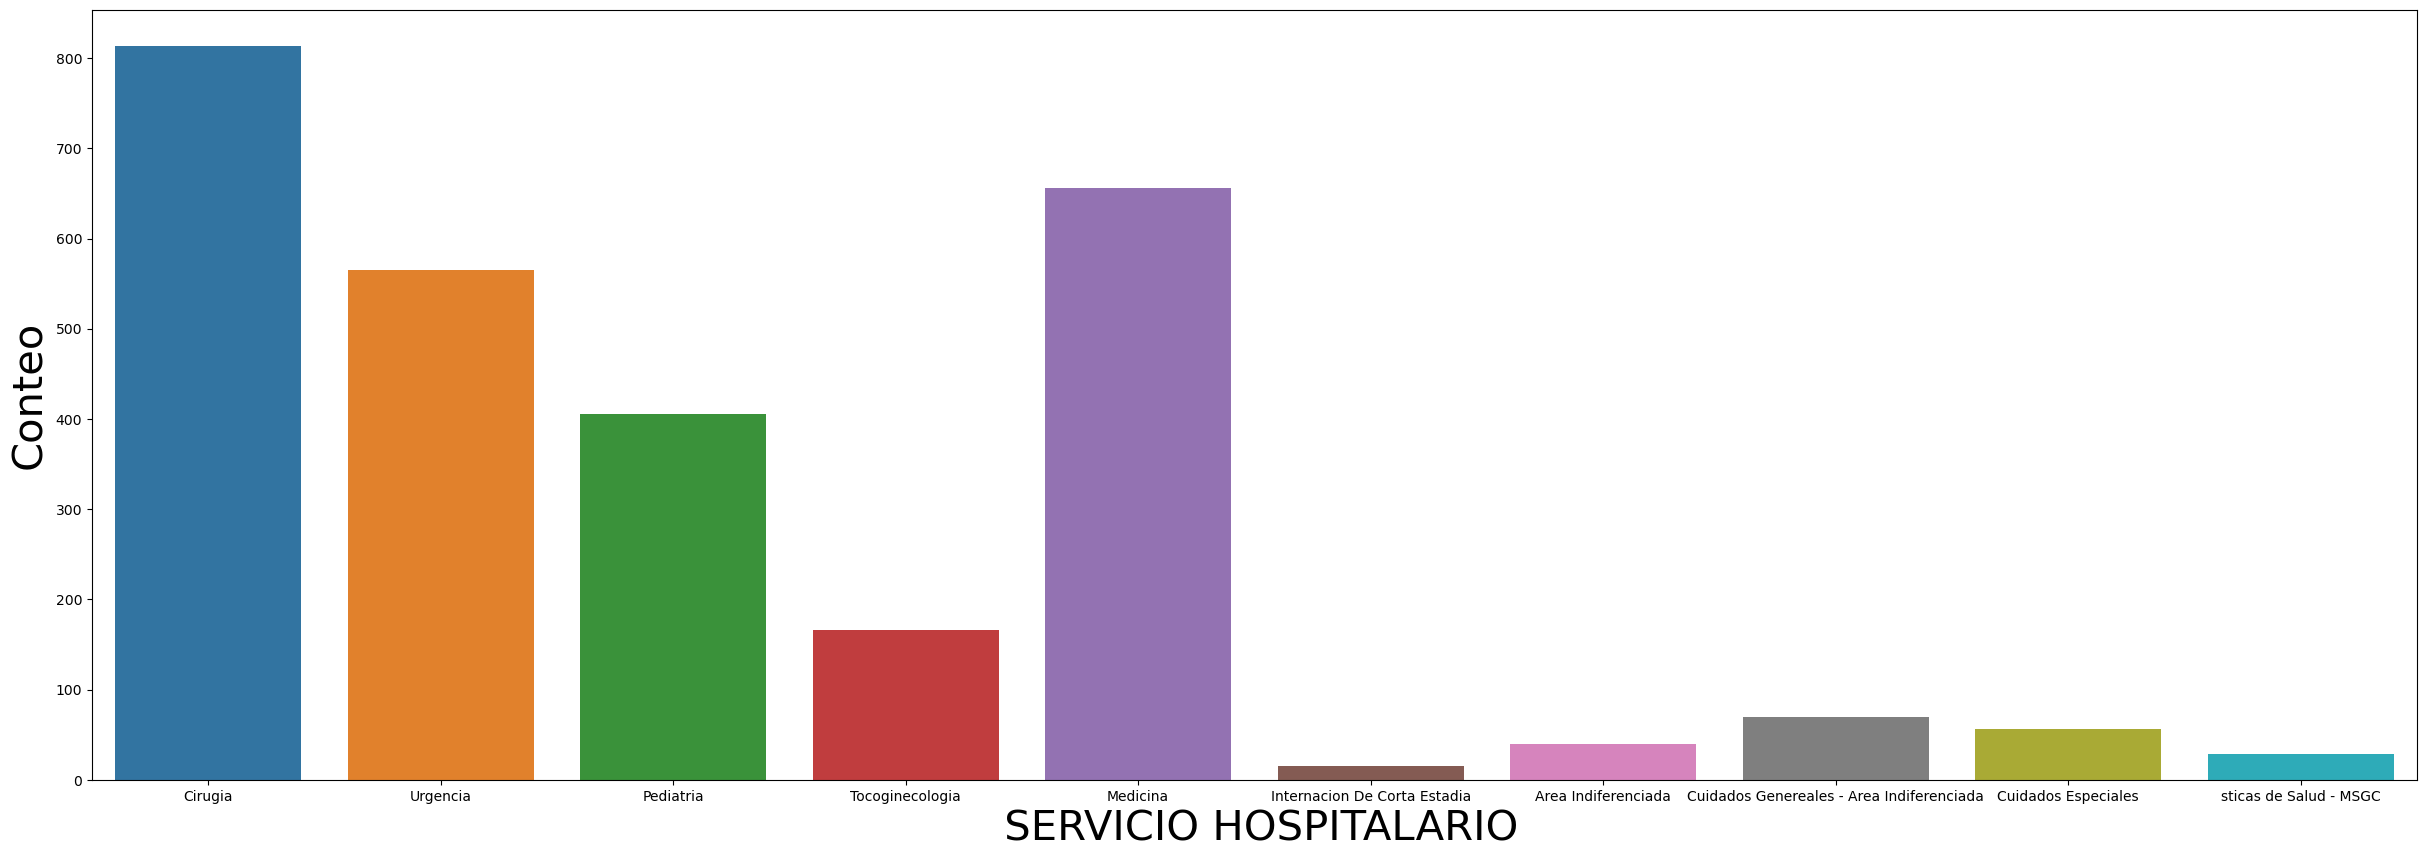

In [38]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x='SERVICIO',data=df)
plt.xlabel(' SERVICIO HOSPITALARIO', fontsize=30)
plt.ylabel('Conteo', fontsize=30)
plt.show()

In [39]:
df.SERVICIO.value_counts()

Cirugia                                      813
Medicina                                     656
Urgencia                                     565
Pediatria                                    406
Tocoginecologia                              166
Cuidados Genereales - Area Indiferenciada     69
Cuidados Especiales                           56
Area Indiferenciada                           40
sticas de Salud - MSGC                        28
Internacion De Corta Estadia                  15
Name: SERVICIO, dtype: int64

**Vemos la relación defunciones por servicio anual

Text(0, 0.5, 'SERVICIO')

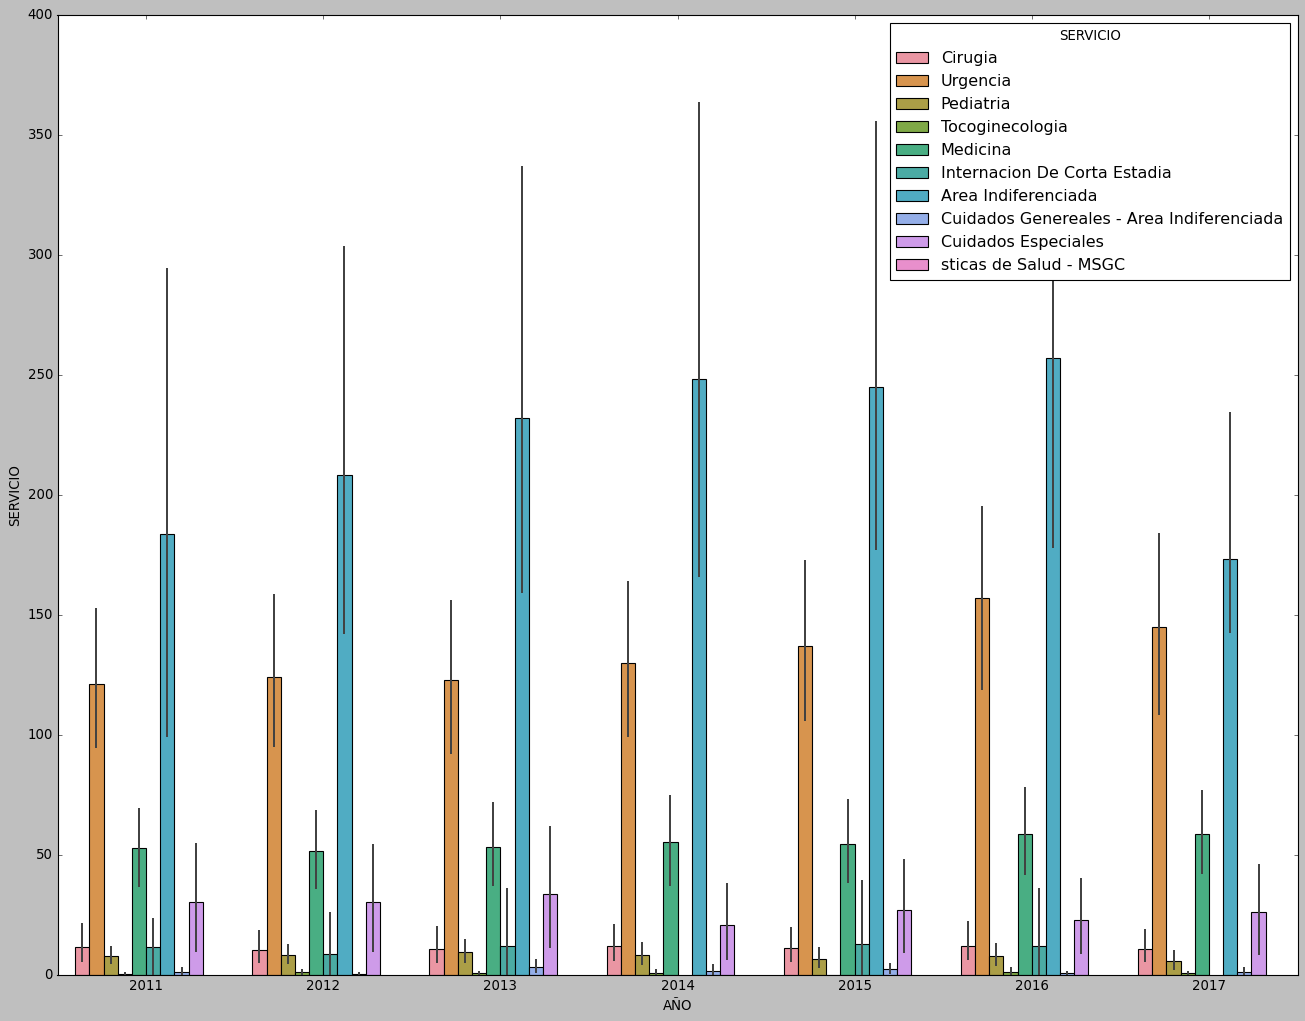

In [96]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.barplot(y='DEF',x='ANIO',hue='SERVICIO',data=df);
plt.xlabel('AÑO')
plt.ylabel('SERVICIO')

** Y la tasa de mortalidad por servicio anual

Text(0, 0.5, 'SERVICIO')

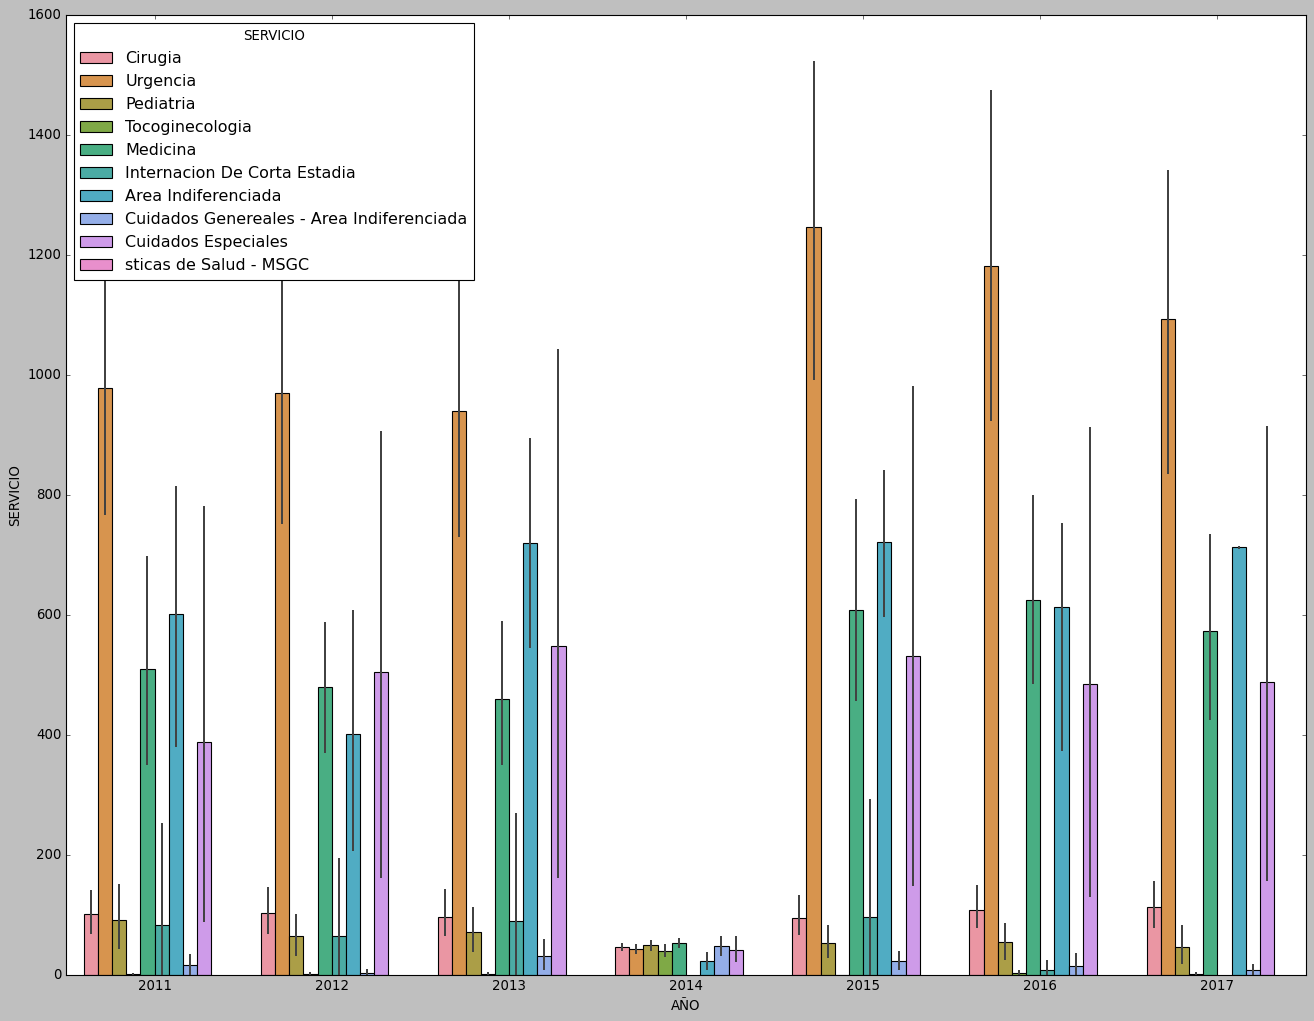

In [97]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.barplot(y='TASA_MORT_HOSP',x='ANIO',hue='SERVICIO',data=df);
plt.xlabel('AÑO')
plt.ylabel('SERVICIO')

** Ya aquí podemos observar una disminución de la tasa de mortalidad en el año 2014

**Si queremos observar sobre la totalidad de los datos suministrados la tasa de mortalidad por servicio, veremos que si bien tienen mayores ingresos CIRUGIA,MEDICINA y URGENCIA, la tasa de mortalidad es alta en el servicio de MEDICINA y URGENCIA Y AREA INDIFERENCIADA.

Text(0, 0.5, 'TASA MORTALIDAD')

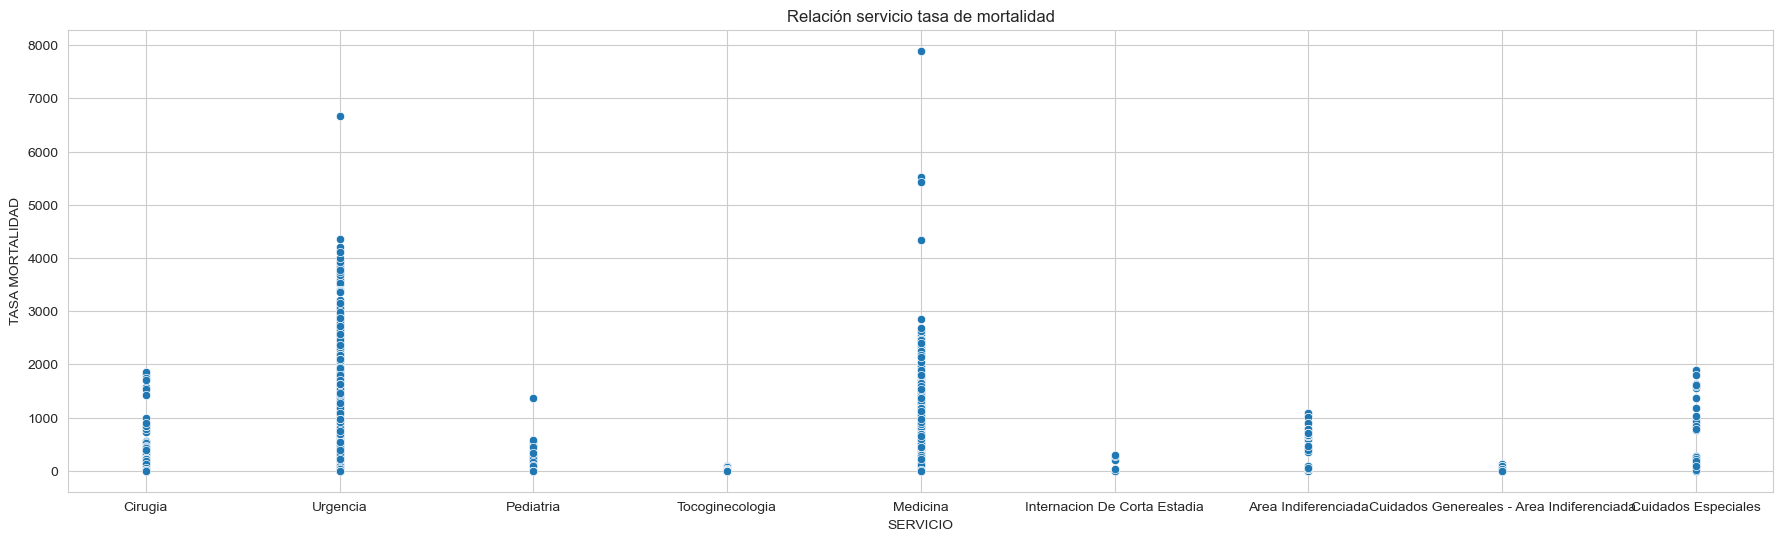

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(22,6))
sns.scatterplot(x=df.SERVICIO, y= df.TASA_MORT_HOSP)
plt.title('Relación servicio tasa de mortalidad')
plt.xlabel('SERVICIO')
plt.ylabel('TASA MORTALIDAD')

In [100]:
df.groupby('SERVICIO')[['TOTAL', 'ALTAS', 'DEF', 'TASA_MORT_HOSP']].mean()

,TOTAL,ALTAS,DEF,TASA_MORT_HOSP
SERVICIO,,,,
Area Indiferenciada,3555.900000,3332.050000,223.850000,543.794872
Cirugia,812.332099,800.988889,11.343210,95.442236
Cuidados Especiales,1528.714286,1501.303571,27.410714,426.928571
Cuidados Genereales - Area Indiferenciada,1312.231884,1310.608696,1.623188,20.840580
Internacion De Corta Estadia,482.333333,470.866667,11.466667,68.666667
Medicina,649.251524,594.300305,54.951220,472.478593
Pediatria,1341.002463,1333.140394,7.862069,62.255583
Tocoginecologia,2981.253012,2980.481928,0.771084,7.289157
Urgencia,2017.508865,1883.562057,133.946809,920.103387


Veamos entonces si la tasa de mortalidad se ha mantenido de manera constante en los Hospitales de Ciudad en el transcurso de 6 años

Text(0, 0.5, 'Defunciones')

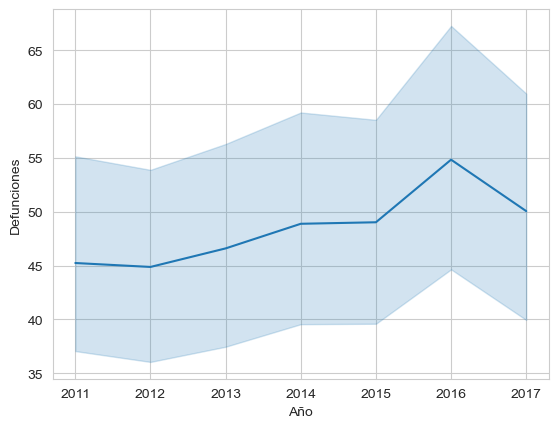

In [42]:
may_flights = df
sns.lineplot(data=df, x="ANIO", y="DEF")
plt.xlabel('Año')
plt.ylabel('Defunciones')

Text(0, 0.5, 'Tasa Mortalidad')

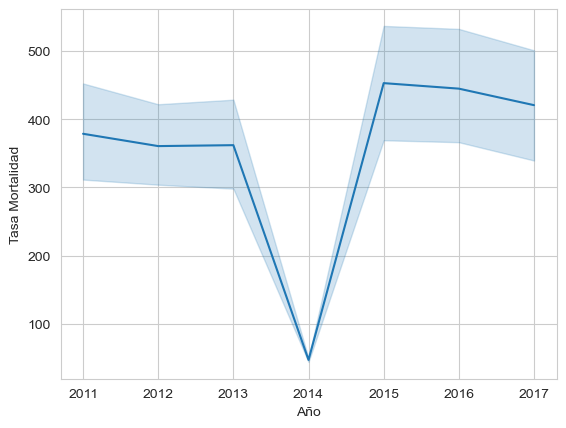

In [65]:
may_flights = df
sns.lineplot(data=df, x="ANIO", y="TASA_MORT_HOSP")
plt.xlabel('Año')
plt.ylabel('Tasa Mortalidad')

Text(0.5, 1.0, 'TASA DE MORTALIDAD POR SERVICIO ANUAL')

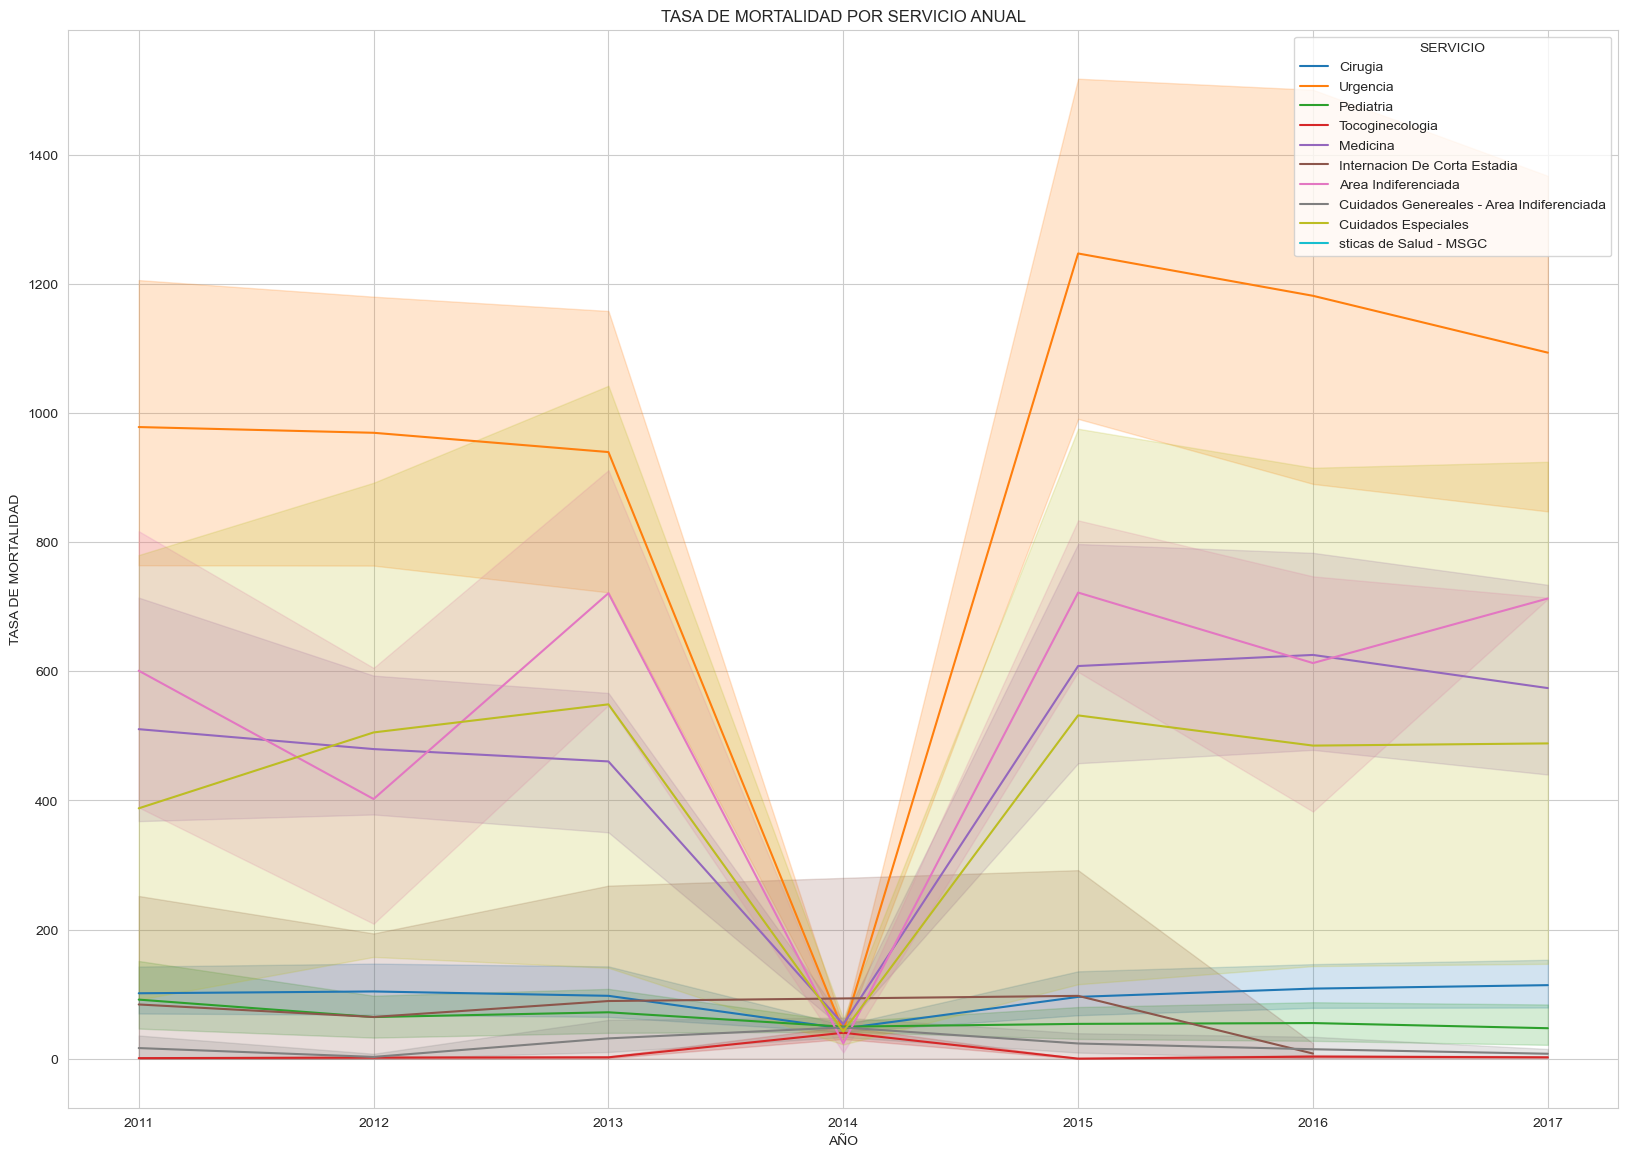

In [55]:
plt.figure(figsize=(20,14))
sns.lineplot(x= df.ANIO, y= df.TASA_MORT_HOSP
, hue=df.SERVICIO
)
plt.xlabel('AÑO')
plt.ylabel('TASA DE MORTALIDAD')
plt.title('TASA DE MORTALIDAD POR SERVICIO ANUAL')

**Según los datos analizados, podemos decir que:
- Las defunciones se incrementaron, teniendo su pico máximo en el año 2016 y han ido en descenso hacia el 2017.
- Sin embargo la tasa de mortalidad descendió considerablemente en el 2014, incrementándose en el 2015 y manteniendo un pequeño descenso hacia el 2017.
- Se registran más ingresos en CIRUGIA,MEDICINA y URGENCIA, pero los servicios con mayor tasa de mortalidad son los de AREA INDIFERENCIADA, URGENCIA y MEDICINA.
- Los Hospitales con mayor tasa de mortalidad son: HOSPITAL MUNICIPAL DE ONCOLOGIA MARIE CURIE, HOSPITAL DE INFECCIOSAS F. MUÑIZ,HOSPITAL GENERAL DE AGUDOS DR. E. TORNU
 **Por lo tanto, el área de cirugía no posee la mayor tasa de mortalidad, ni la tasa de mortalidad se ha mantenido en forma lineal en el transcurso de estos años